In [1]:
from PyMPDATA import Options
options = Options(n_iters=1)

In [2]:
from PyMPDATA import ScalarField
from PyMPDATA import VectorField
from PyMPDATA.boundary_conditions import Periodic
import numpy as np

nx, ny = 24, 24
Cx, Cy = -.5, -.25
halo = options.n_halo

xi, yi = np.indices((nx, ny), dtype=float)
advectee = ScalarField(
  data=np.exp(
    -(xi+.5-nx/2)**2 / (2*(nx/10)**2)
    -(yi+.5-ny/2)**2 / (2*(ny/10)**2)
  ),
  halo=halo,
  boundary_conditions=(Periodic(), Periodic())
)
advector = VectorField(
  data=(np.full((nx + 1, ny), Cx), np.full((nx, ny + 1), Cy)),
  halo=halo,
  boundary_conditions=(Periodic(), Periodic())
)

### Stepper

In [3]:
from PyMPDATA import Stepper

stepper = Stepper(options=options, n_dims=2, n_threads=1)

In [4]:
stepper = Stepper(options=options, grid=(nx, ny))

### Solver

In [5]:
from PyMPDATA import Solver

solver = Solver(stepper=stepper, advectee=advectee, advector=advector)
state_0 = solver.advectee.get().copy()
solver.advance(n_steps=75)
state = solver.advectee.get()

### Plot

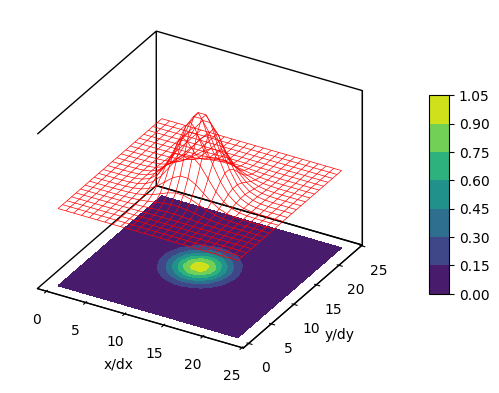

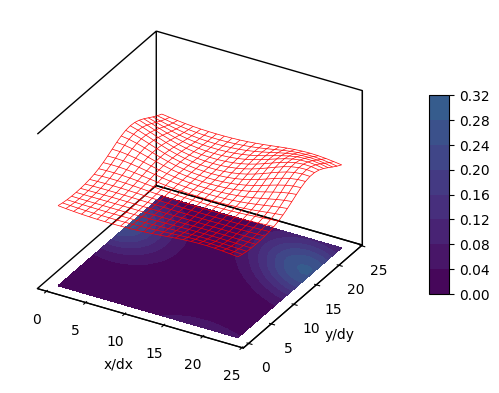

In [6]:
from matplotlib import pyplot


def plot(psi, zlim, norm=None):
    xi, yi = np.indices(psi.shape)
    fig, ax = pyplot.subplots(subplot_kw={"projection": "3d"})
    pyplot.gca().plot_wireframe(
        xi+.5, yi+.5,
        psi, color='red', linewidth=.5
    )
    ax.set_zlim(zlim)
    for axis in (ax.xaxis, ax.yaxis, ax.zaxis):
        axis.pane.fill = False
        axis.pane.set_edgecolor('black')
        axis.pane.set_alpha(1)
    ax.grid(False)
    ax.set_zticks([])
    ax.set_xlabel('x/dx')
    ax.set_ylabel('y/dy')
    ax.set_proj_type('ortho')
    cnt = ax.contourf(xi+.5, yi+.5, psi, zdir='z', offset=-1, norm=norm)
    cbar = pyplot.colorbar(cnt, pad=.1, aspect=10, fraction=.04)
    return cbar.norm

zlim = (-1, 1)
norm = plot(state_0, zlim)
pyplot.savefig('readme_gauss_0.png')
plot(state, zlim, norm)
pyplot.savefig('readme_gauss.png')